<a href="https://colab.research.google.com/github/xorToja/data-science-bootcamp/blob/master/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import bibliotek

In [ ]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.18.5
Pandas: 1.0.5


In [ ]:
def fetch_financial_data(company='AMZN'):
  """
  Pobiera dane dotyczące notowań spółek na giełdzie
  według symboli na serwisie stooq.pl
  """
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-09-03 to 2015-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-03,3485.00,3488.4100,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.500,3401.80,2896978
...,...,...,...,...,...
2015-09-14,529.44,532.4500,518.580,521.38,3130200
2015-09-11,521.07,529.4400,520.600,529.44,3227800
2015-09-10,515.15,526.1300,514.780,522.24,2574927


In [ ]:
df.head() # domyślnie 5

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-03,3485.00,3488.4100,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.500,3401.80,2896978


In [ ]:
df.tail() # domyślnie 5

,Open,High,Low,Close,Volume
Date,,,,,
2015-09-14,529.44,532.45,518.58,521.38,3130200
2015-09-11,521.07,529.44,520.60,529.44,3227800
2015-09-10,515.15,526.13,514.78,522.24,2574927
2015-09-09,524.00,529.95,515.06,516.89,4370600
2015-09-08,508.69,518.35,508.51,517.54,3810600


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2020-09-03,3485.00,3488.4100,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.500,3401.80,2896978


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.390603e+03,6.448033e+02,478.01,7.993275e+02,1449.070,1.820488e+03,3.547000e+03
high,1258.0,1.404879e+03,6.536054e+02,493.50,8.058992e+02,1468.970,1.831578e+03,3.552250e+03
low,1258.0,1.374710e+03,6.355074e+02,474.00,7.949887e+02,1424.705,1.802040e+03,3.486685e+03
close,1258.0,1.390728e+03,6.450345e+02,482.07,8.005450e+02,1450.970,1.818773e+03,3.531450e+03
volume,1258.0,4.269290e+06,2.143826e+06,881337.00,2.821104e+06,3709649.500,5.106141e+06,1.655260e+07


# Selekcja kolumn

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2020-09-03,3485.00,3488.4100,3303.0000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.6850,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.0000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.0000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258


In [ ]:
df['open']

Date
2020-09-03    3485.00
2020-09-02    3547.00
2020-09-01    3489.58
2020-08-31    3408.99
2020-08-28    3423.00
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
2020-08-21    3295.00
Name: open, dtype: float64

In [ ]:
df.open

Date
2020-09-03    3485.00
2020-09-02    3547.00
2020-09-01    3489.58
2020-08-31    3408.99
2020-08-28    3423.00
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
2020-08-21    3295.00
Name: open, dtype: float64

In [ ]:
df[['open']]

,open
Date,
2020-09-03,3485.00
2020-09-02,3547.00
2020-09-01,3489.58
2020-08-31,3408.99
2020-08-28,3423.00
2020-08-27,3450.05
2020-08-26,3351.11
2020-08-25,3294.99
2020-08-24,3310.15


In [ ]:
df.iloc[:, 0]

Date
2020-09-03    3485.00
2020-09-02    3547.00
2020-09-01    3489.58
2020-08-31    3408.99
2020-08-28    3423.00
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
2020-08-21    3295.00
Name: open, dtype: float64

In [ ]:
df.iloc[:, [0,3]]

,open,close
Date,,
2020-09-03,3485.00,3368.00
2020-09-02,3547.00,3531.45
2020-09-01,3489.58,3499.12
2020-08-31,3408.99,3450.96
2020-08-28,3423.00,3401.80
2020-08-27,3450.05,3400.00
2020-08-26,3351.11,3441.85
2020-08-25,3294.99,3346.49
2020-08-24,3310.15,3307.46


In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2020-09-03,3368.00,8161113
2020-09-02,3531.45,3931476
2020-09-01,3499.12,3476407
2020-08-31,3450.96,4185885
2020-08-28,3401.80,2896978
2020-08-27,3400.00,4264795
2020-08-26,3441.85,6508743
2020-08-25,3346.49,3992842
2020-08-24,3307.46,4666258


In [ ]:
df.iloc[:, -1:]

,volume
Date,
2020-09-03,8161113
2020-09-02,3931476
2020-09-01,3476407
2020-08-31,4185885
2020-08-28,2896978
2020-08-27,4264795
2020-08-26,6508743
2020-08-25,3992842
2020-08-24,4666258


In [ ]:
df.iloc[:, -1]

Date
2020-09-03    8161113
2020-09-02    3931476
2020-09-01    3476407
2020-08-31    4185885
2020-08-28    2896978
2020-08-27    4264795
2020-08-26    6508743
2020-08-25    3992842
2020-08-24    4666258
2020-08-21    3575862
Name: volume, dtype: int64

# Selekcja wierszy

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2020-09-03,3485.00,3488.4100,3303.0000,3368.00,8161113
2020-09-02,3547.00,3552.2500,3486.6850,3531.45,3931476
2020-09-01,3489.58,3513.8700,3467.0000,3499.12,3476407
2020-08-31,3408.99,3495.0000,3405.0000,3450.96,4185885
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258


In [ ]:
df.iloc[0]

open         3485.00
high         3488.41
low          3303.00
close        3368.00
volume    8161113.00
Name: 2020-09-03 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2020-09-03,3485.00,3488.41,3303.000,3368.00,8161113
2020-09-02,3547.00,3552.25,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.87,3467.000,3499.12,3476407


In [ ]:
df.loc['2020-09-02']

,open,high,low,close,volume
Date,,,,,
2020-09-02,3547.0,3552.25,3486.685,3531.45,3931476


In [ ]:
df.loc['2020-09-02': '2020-08-30']

,open,high,low,close,volume
Date,,,,,
2020-09-02,3547.00,3552.25,3486.685,3531.45,3931476
2020-09-01,3489.58,3513.87,3467.000,3499.12,3476407
2020-08-31,3408.99,3495.00,3405.000,3450.96,4185885


# Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2020-09-03 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    334 non-null    float64
 1   High    334 non-null    float64
 2   Low     334 non-null    float64
 3   Close   334 non-null    float64
 4   Volume  334 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.7 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-03,34.08,34.740,32.9500,33.41,17288823
2020-09-02,34.21,34.505,33.2900,34.37,16552685
2020-09-01,33.45,34.510,33.1450,34.30,16026170
2020-08-31,33.62,33.920,33.1401,33.63,14980621
2020-08-28,33.00,33.940,32.8200,33.80,17833021


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,334.000000,334.000000,334.000000,334.000000,3.340000e+02
mean,33.771433,34.449791,32.962895,33.731826,2.493259e+07
std,5.699989,5.634662,5.715077,5.639288,2.025217e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.020000,30.445000,29.395000,30.080000,1.039060e+07
50%,32.740000,33.337500,32.011500,32.775000,2.077878e+07
75%,37.260000,37.766250,36.272500,37.007500,3.272974e+07
max,46.980000,47.080000,45.080000,46.380000,1.863225e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-03,34.08,34.740,32.950,33.41,17288823
2020-09-02,34.21,34.505,33.290,34.37,16552685
2020-09-01,33.45,34.510,33.145,34.30,16026170


In [ ]:
df['Average'] = (df.Open + df.Close) / 2

In [ ]:
df.head(3)

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-09-03,34.08,34.740,32.950,33.41,17288823,33.745
2020-09-02,34.21,34.505,33.290,34.37,16552685,34.290
2020-09-01,33.45,34.510,33.145,34.30,16026170,33.875


In [ ]:
df = df.sort_index() # sortowanie na odwrót po indeksie
df.head(3)

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135


In [ ]:
df.Close.shift(1) # przesuwa dane o 1 w dół

Date
2019-05-10      NaN
2019-05-13    41.57
2019-05-14    37.10
2019-05-15    39.96
2019-05-16    41.29
              ...  
2020-08-28    32.80
2020-08-31    33.80
2020-09-01    33.63
2020-09-02    34.30
2020-09-03    34.37
Name: Close, Length: 334, dtype: float64

In [ ]:
df['Close_shift'] = df.Close.shift(1)

In [ ]:
df.head(3)

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10


In [ ]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
del df['Daily Change']
df.head(3)

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089


In [ ]:
df.Daily_Change.min()

-0.21628767847699626

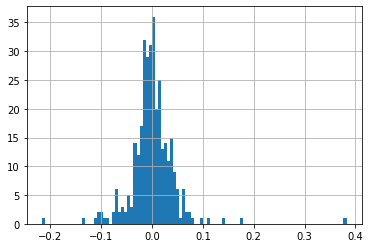

In [ ]:
df.Daily_Change.hist(bins = 100) # 100 słupków histogramu

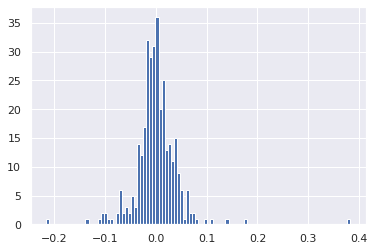

In [ ]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins = 100)


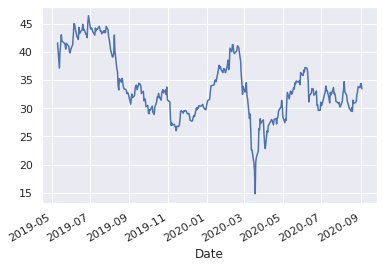

In [ ]:
df.Close.plot()

# Filtrowanie Danych

In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-08-28,33.00,33.940,32.8200,33.80,17833021,33.400,32.80,0.030488
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,33.80,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,33.63,0.019923


In [ ]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.510,40.500,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.570,39.410,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2020-08-26,31.01,32.710,30.950,32.30,20599776,31.655,31.19,0.035588
2020-08-27,32.40,33.070,32.270,32.80,21306491,32.600,32.30,0.015480
2020-08-28,33.00,33.940,32.820,33.80,17833021,33.400,32.80,0.030488


In [ ]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.290,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.680,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.240,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.280,40.5000,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2020-08-17,30.05,30.120,29.1400,29.48,18544676,29.765,29.99,-0.017006
2020-08-19,30.15,30.349,29.3900,29.42,14050333,29.785,30.08,-0.021941
2020-08-21,31.39,31.820,30.7144,30.83,20216997,31.110,31.41,-0.018465


In [ ]:
df_positive.Daily_Change.mean()

0.028588790658181228

In [ ]:
df_negative.Daily_Change.mean()

-0.02579421158863213

In [ ]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2020-08-28    False
2020-08-31    False
2020-09-01    False
2020-09-02    False
2020-09-03    False
Length: 334, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832


In [ ]:
df[df.Close == df.Low]


,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303


In [ ]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.750,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.300,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.550,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.420,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.620,26.9150,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2020-08-28,33.00,33.940,32.8200,33.80,17833021,33.400,32.80,0.030488
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,33.80,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,33.63,0.019923


In [ ]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [ ]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [ ]:
df[df.index.year == 2020]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-01-02,29.94,31.000,29.7900,30.99,20583240,30.465,29.74,0.042031
2020-01-03,30.62,31.430,30.4800,31.37,18831450,30.995,30.99,0.012262
2020-01-06,31.01,32.060,31.0000,31.58,21215865,31.295,31.37,0.006694
2020-01-07,31.79,32.840,31.3600,32.81,30268966,32.300,31.58,0.038949
2020-01-08,32.73,34.520,32.4600,33.93,43955449,33.330,32.81,0.034136
...,...,...,...,...,...,...,...,...
2020-08-28,33.00,33.940,32.8200,33.80,17833021,33.400,32.80,0.030488
2020-08-31,33.62,33.920,33.1401,33.63,14980621,33.625,33.80,-0.005030
2020-09-01,33.45,34.510,33.1450,34.30,16026170,33.875,33.63,0.019923


In [ ]:
df[(df.index.month == 5) & (df.index.year == 2020)]


,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-05-01,29.13,29.7200,28.325,28.39,19290192,28.760,30.27,-0.062108
2020-05-04,27.56,28.0700,26.580,27.42,23428333,27.490,28.39,-0.034167
2020-05-05,28.25,28.9088,27.440,28.07,30725371,28.160,27.42,0.023705
2020-05-06,27.50,28.0600,26.810,27.82,31076451,27.660,28.07,-0.008906
2020-05-07,29.60,31.6500,29.580,30.93,62229496,30.265,27.82,0.111790
2020-05-08,32.59,33.3000,31.640,32.79,69525793,32.690,30.93,0.060136
2020-05-11,31.98,32.3850,31.410,31.64,26439191,31.810,32.79,-0.035072
2020-05-12,31.42,34.4500,30.410,32.40,89585967,31.910,31.64,0.024020
2020-05-13,32.30,33.0600,30.830,33.02,47279487,32.660,32.40,0.019136
